<a href="https://colab.research.google.com/github/Ka275578/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_second_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name - NYC Taxi Trip Time Prediction</u></b>

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Kumar Anand
##### **email** - ka275578@gmail.com 

# **Project Summary -**

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, we have to predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - contains 1458644 trip records and 11 Data fields.

### New York City is well known for traffic jams which happens due to roadworks, street closures or various other reason.
### Due to this high congestion on the roads it has become very much important to know the trip duration before starting any trip.
### In this project we will be developing various machine learning regression models which will predict the trip timing based on the given dataset.
### ML models used for this project and the respective hyperparametes used - 
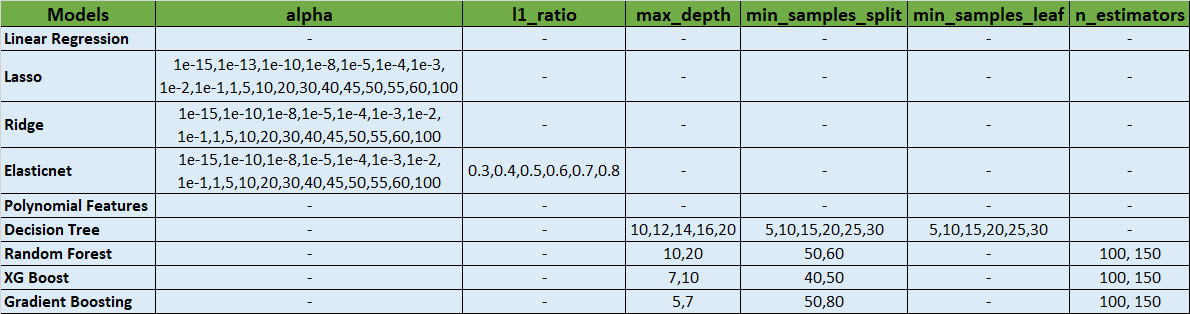
### Predictions made through these models will give the person taking ride a prior estimation of the trip timings so that he/she can plan their work accordingly.


### Following are the metrics we got for various ML models on the test set -
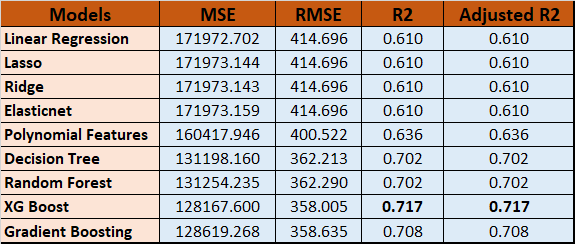
### Prediction made by XG Boost Regressor is best with R2 and adjusted R2 of 0.717.

# **GitHub Link -**

https://github.com/Ka275578/NYC-Taxi-Trip-Time-Prediction

# **Problem Statement**

* Now a days there is sudden increase in the popularity of app based taxi service providers like Uber, Curb, Lyft etc. in the NYC. So, it has become very much important for these companies to predict the ride timings more accurately before start of any trip.
* Knowing the trip duration beforehand will help the rider in planning their day accordingly.
* Also, for people taking taxis for going to office, knowing trip duration is very much important so that they can leave on proper time from their home.
* So, it has become extremely important to predict the trip duration accurately which depend on several parameters like trip distance, start time, pickup location, drop location etc.
* As trip duration depends on a lot of parameters, so the best way to predict the trip duration is with the help of some historical dataset (in this case NYC taxi dataset) by employing machine learning models.
* Our main goal is to build a model that predicts the total ride duration of taxi trips from New York City Taxi and Limousine Commission (TLC) dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Start !***

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import math

#from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

###Load dataset

In [9]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [13]:
nyc_taxi_dataset = pd.read_csv('/content/mydrive/MyDrive/NYC-Taxi-Trip-Time-Prediction_Kumar_Anand/NYC Taxi Data.csv')

### Dataset Rows & Columns count

### Dataset First View

In [15]:
#Let's have a look on dataset
nyc_taxi_dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [16]:
nyc_taxi_dataset.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [17]:
nyc_taxi_dataset.shape

(1458644, 11)

There are total 1458644 entries and 11 features in the dataset. Lets explore more to know the type of features.

### Dataset Information

In [20]:
#checking the info of dataset
nyc_taxi_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Checking duplicate Values

In [22]:
#Checking the unique values in the dataset
nyc_taxi_dataset.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

There are 1458644 unique entries in column 'id' which is same as number of rows in the dataset. So, there is no duplicate entries in the dataset.